In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set_theme(style='darkgrid', palette='deep')

In [3]:
#loading the data
boston = pd.read_csv('BostonHousing.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
boston.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price']

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


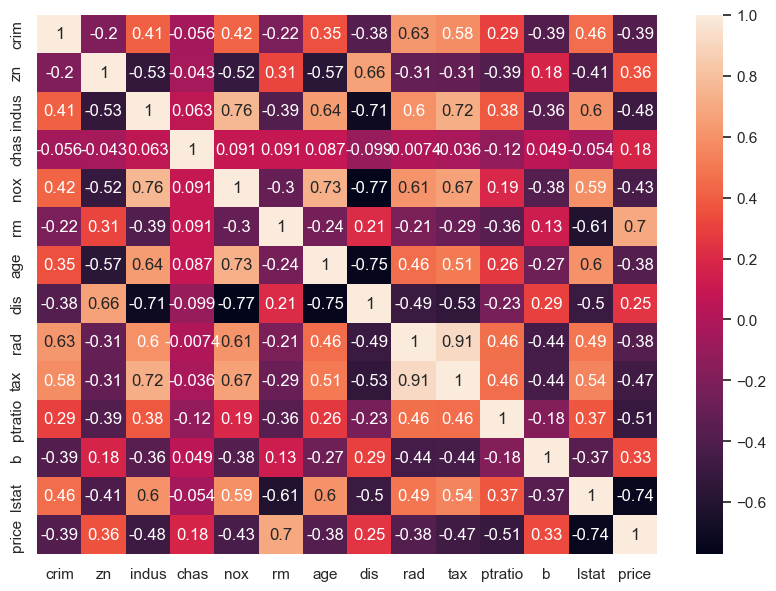

In [7]:
# Analyze Correlation 

plt.figure(figsize=(10,7))
correlations = boston.corr()
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations,annot=True)
plt.show()

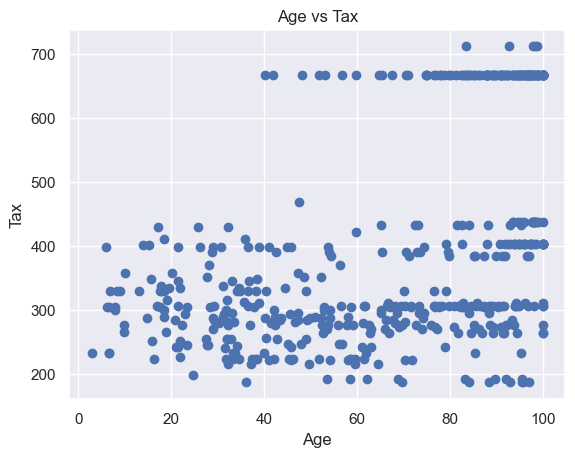

In [8]:
# scotterplot for analysis

x1=boston['age']
y1=boston['tax']
plt.scatter(x1,y1)
plt.plot()
plt.xlabel('Age')
plt.ylabel('Tax')
plt.title("Age vs Tax")
plt.show()

In [9]:
boston.shape

(506, 14)

In [10]:
boston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [12]:
boston.iloc[:,0:13].head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [13]:
x=boston.iloc[:,0:13].head(2)

In [14]:
y=boston['price']

In [16]:
X_boston = boston.drop(['price'],axis=1, inplace=True)
boston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [17]:
#split the 
X_train, X_test, Y_train, Y_test = train_test_split(boston, y, test_size=0.2, random_state=0)

In [21]:
lm= linear_model.LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [22]:
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

In [24]:
pred_train.shape

(404,)

In [25]:
pred_test.shape

(102,)

In [28]:
df_train = pd.DataFrame(pred_train,Y_train)
df_train

,0
price,
26.7,32.556927
21.7,21.927095
22.0,27.543826
22.9,23.603188
10.4,6.571910
...,...
18.5,19.494951
36.4,33.326364
19.2,23.796208


In [30]:
df_test = pd.DataFrame(pred_test,Y_test)
df_test

,0
price,
22.6,24.889638
50.0,23.721411
23.0,29.364999
8.3,12.122386
21.2,21.443823
...,...
24.7,25.442171
14.1,15.571783
18.7,17.937195


In [31]:
# Test Predictions
type(pred_test)

numpy.ndarray

In [32]:
# Test results
type(Y_test)

pandas.core.series.Series

In [33]:
# 13 columns of X_test, x1,x2...xn
type(X_test)

pandas.core.frame.DataFrame

In [34]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted':pred_test})

In [35]:
df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


In [36]:
df_new = pd.concat([X_test,df],axis=1)

In [37]:
df_new

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Actual,Predicted
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34,22.6,24.889638
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,23.721411
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,29.364999
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3,12.122386
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2,21.443823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7,25.442171
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,15.571783
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15,18.7,17.937195
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1,25.305888


In [38]:
df_new.to_csv('boston_actual_predicted_test.csv')